<a href="https://colab.research.google.com/github/yash2907183/plant-disease-detection-model/blob/main/plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf

In [2]:
#set seeds for reproducibility
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [3]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

Data Curation
upload the kaggle.json file

In [4]:
!pip install kaggle

In [5]:
kaggle_credentials = json.load(open("kaggle (1).json"))

In [6]:
# setup kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentials["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentials["key"]

In [7]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0


In [8]:
!ls

'kaggle (1).json'   plantvillage-dataset.zip   sample_data


In [9]:
# unzip the downloaded dataset
with ZipFile("/content/plantvillage-dataset.zip", 'r') as zip_ref:
  zip_ref.extractall()

In [10]:
print(os.listdir("/content/plantvillage dataset"))

print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'grayscale', 'segmented']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']
38
['Corn_(maize)___Northern_Leaf_Blight', 'Tomato___Tomato_mosaic_virus', 'Orange___Haunglongbing_(Citrus_greening)', 'Corn_(maize)___healthy', 'Blueberry___healthy']


Number of classes : **38**

In [11]:
print(len(os.listdir("/content/plantvillage dataset/color/Grape___healthy")))
print(os.listdir("/content/plantvillage dataset/color/Grape___healthy")[:5])

423
['8c5181ab-8b06-41a8-9b26-b3be052dcea1___Mt.N.V_HL 8905.JPG', 'fc24bccd-6d46-48b8-9dad-99f7bc0e3eec___Mt.N.V_HL 6031.JPG', 'b07129a6-b8b0-4715-b76f-f89bd40c6770___Mt.N.V_HL 8994.JPG', '5a726e51-407a-4a85-a671-65a82d275fda___Mt.N.V_HL 8961.JPG', '1f9ead63-93e5-4379-885b-b2b57352202b___Mt.N.V_HL 8938.JPG']


Data preprocessing

In [12]:
#dataset paths
base_dir = '/content/plantvillage dataset/color'

(256, 256, 3)


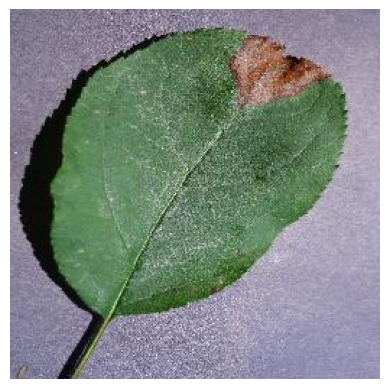

In [13]:
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/0139bc6d-391c-4fd1-bcae-cc74dabfddd7___JR_FrgE.S 2734.JPG'

#read the image
img = mpimg.imread(image_path)

print(img.shape)
#display the image
plt.imshow(img)
plt.axis('off')
plt.show()

In [14]:
#image parameters
img_size = 224
batch_size = 32

Train-Test split

In [15]:
#image generator
data_gen = ImageDataGenerator(rescale = 1./255,
                              validation_split= 0.2)

In [16]:
#Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size =(img_size, img_size),
    batch_size = batch_size,
    subset = 'training',
    class_mode = 'categorical'
)

Found 43456 images belonging to 38 classes.


In [17]:
#Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size =(img_size, img_size),
    batch_size = batch_size,
    subset = 'validation',
    class_mode = 'categorical'
)

Found 10849 images belonging to 38 classes.


Convolutional Neural Network

In [18]:
#Model Detection
model = models.Sequential()

model.add(layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Conv2D(64,(3,3), activation = 'relu'))
model.add(layers.MaxPooling2D(2,2))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
#model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model Training

In [21]:
#Training the model
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size, #number of steps per epoch
    epochs = 5,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size # validation steps
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1358/1358 ━━━━━━━━━━━━━━━━━━━━ 106s 74ms/step - accuracy: 0.6038 - loss: 1.6207 - val_accuracy: 0.8685 - val_loss: 0.4209
Epoch 2/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 142s 77ms/step - accuracy: 0.9213 - loss: 0.2504 - val_accuracy: 0.8601 - val_loss: 0.4636
Epoch 3/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 131s 69ms/step - accuracy: 0.9652 - loss: 0.1085 - val_accuracy: 0.8676 - val_loss: 0.4879
Epoch 4/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 143s 70ms/step - accuracy: 0.9772 - loss: 0.0719 - val_accuracy: 0.8814 - val_loss: 0.4688
Epoch 5/5
1358/1358 ━━━━━━━━━━━━━━━━━━━━ 151s 77ms/step - accuracy: 0.9858 - loss: 0.0469 - val_accuracy: 0.8791 - val_loss: 0.5526


Model Evaluation

In [22]:
#Model evaluation
print("Evaluating Model..")
val_loss, val_accuracy = model.evaluate(validation_generator, steps = validation_generator.samples // batch_size)
print(val_accuracy, val_loss)
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

Evaluating Model..
339/339 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step - accuracy: 0.8789 - loss: 0.5438
0.8790560364723206 0.5526372194290161
Validation Accuracy: 87.91%


In [23]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


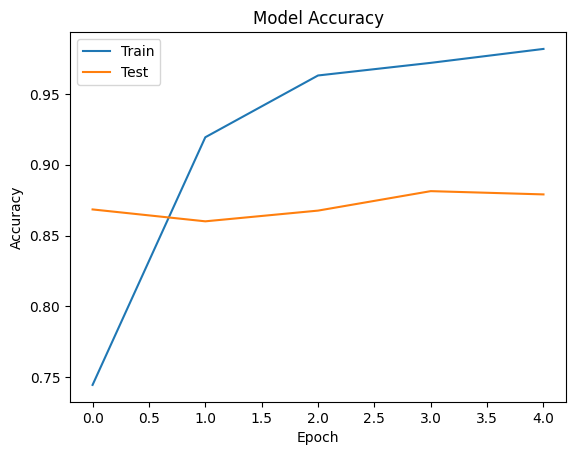

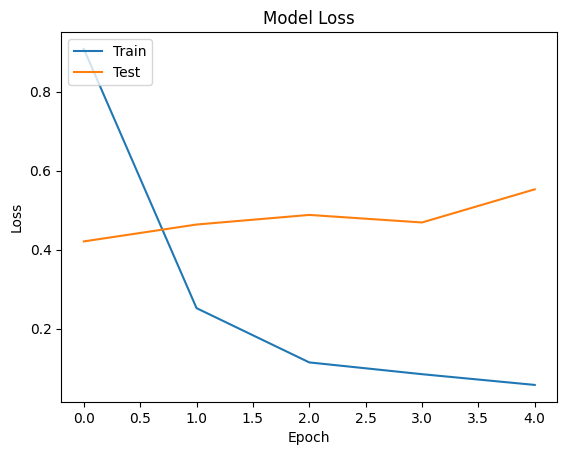

In [24]:
#Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

#Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

Build a Predictive System

In [25]:
#Function to load and preprocess the image using Pillow
def load_and_preprocess_image(image_path, target_size=(224,224)):
  #load the image
  img = Image.open(image_path)
  #resize the image
  img = img.resize(target_size)
  #convert the image to a numpy array
  img_array = np.array(img)
  #add batch dimension
  img_array = np.expand_dims(img_array, axis = 0)
  #scale the image values to [0,1]
  img_array = img_array.astype('float32') / 255.
  return img_array

#Function to Predict the class of an image
def predict_image_class(model, image_path, class_indices):
  preprocessed_img = load_and_preprocess_image(image_path)
  predictions = model.predict(preprocessed_img)
  predicted_class_index = np.argmax(predictions, axis =1)[0]
  predicted_class_name = class_indices[predicted_class_index]
  return predicted_class_name

In [26]:
#create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [27]:
class_indices

{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [28]:
#saving the names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [29]:
#example usage
image_path = '/content/plantvillage dataset/color/Apple___Black_rot/952ab9a0-bfcc-408c-a7d7-c8ae485acb7c___JR_FrgE.S 2993.JPG'
predicted_class_name = predict_image_class(model, image_path, class_indices)

print(predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 905ms/step
Apple___Apple_scab


In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
import os
os.path.exists('/content/drive/MyDrive')

True

Loading model...
Model loaded successfully!
Loaded 38 classes
Upload an image of a plant leaf to detect diseases:


Saving 012658ed-f0a3-4791-a996-7115dd1e6e3b___FAM_B.Rot 3036_final_masked.jpg to 012658ed-f0a3-4791-a996-7115dd1e6e3b___FAM_B.Rot 3036_final_masked.jpg

Analyzing image...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step


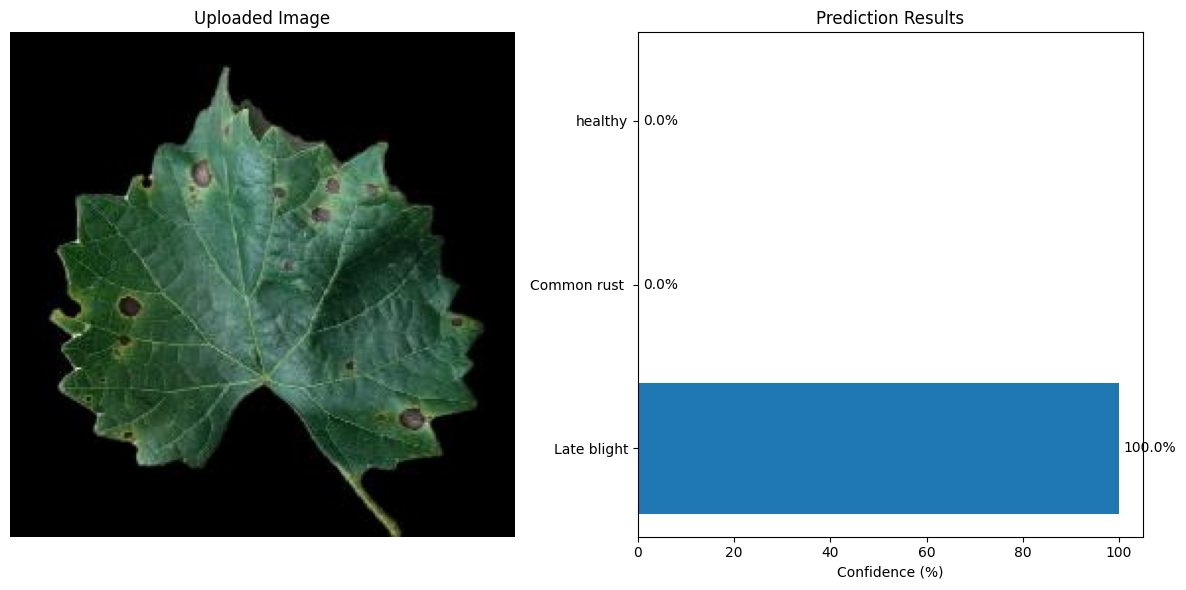


Detailed Results:
1. Tomato - Late blight: 100.00%
2. Corn (maize) - Common rust : 0.00%
3. Blueberry - healthy: 0.00%

Recommended treatment for Tomato - Late blight:
1. Remove affected leaves to prevent spread
2. Ensure proper spacing between plants for good airflow
3. Apply appropriate fungicide or treatment for this specific condition
4. Water at the base of the plant to keep foliage dry
5. Consider crop rotation for future plantings


In [32]:
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
import io

# Update this path to where your files are stored in Google Drive
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/plant disease detection.ipynb.keras'
CLASS_INDICES_PATH = '/content/class_indices.json'

# Load the model
print("Loading model...")
model = tf.keras.models.load_model(MODEL_PATH)
print("Model loaded successfully!")

# Load class indices
with open(CLASS_INDICES_PATH, 'r') as f:
    class_indices = json.load(f)
print(f"Loaded {len(class_indices)} classes")

# Function to preprocess the image
def preprocess_image(img, target_size=(224, 224)):
    img = img.resize(target_size)
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to predict the disease
def predict_disease(img):
    img_array = preprocess_image(img)
    predictions = model.predict(img_array)

    # Get top 3 predictions
    top_indices = np.argsort(predictions[0])[-3:][::-1]
    top_classes = [class_indices[str(idx)] for idx in top_indices]
    top_probs = [predictions[0][idx] * 100 for idx in top_indices]

    return top_classes, top_probs

# Function to parse disease name
def parse_disease_name(disease_name):
    parts = disease_name.split('___')
    plant = parts[0].replace('_', ' ')
    condition = parts[1].replace('_', ' ') if len(parts) > 1 else "Unknown"
    return plant, condition

# Function to display results
def display_results(img, classes, probs):
    plt.figure(figsize=(12, 6))

    # Display the image
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Uploaded Image")
    plt.axis('off')

    # Display the results
    plt.subplot(1, 2, 2)
    conditions = [parse_disease_name(cls)[1] for cls in classes]
    y_pos = np.arange(len(conditions))

    bars = plt.barh(y_pos, probs, align='center')
    plt.yticks(y_pos, conditions)
    plt.xlabel('Confidence (%)')
    plt.title('Prediction Results')

    # Add percentage labels
    for i, bar in enumerate(bars):
        plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
                f'{probs[i]:.1f}%', va='center')

    plt.tight_layout()
    plt.show()

    # Print detailed results
    print("\nDetailed Results:")
    for i, (cls, prob) in enumerate(zip(classes, probs)):
        plant, condition = parse_disease_name(cls)
        print(f"{i+1}. {plant} - {condition}: {prob:.2f}%")

    # Show treatment for top prediction
    plant, condition = parse_disease_name(classes[0])
    print(f"\nRecommended treatment for {plant} - {condition}:")
    if "healthy" in condition.lower():
        print("Your plant appears healthy! Continue regular maintenance.")
    else:
        print("1. Remove affected leaves to prevent spread")
        print("2. Ensure proper spacing between plants for good airflow")
        print("3. Apply appropriate fungicide or treatment for this specific condition")
        print("4. Water at the base of the plant to keep foliage dry")
        print("5. Consider crop rotation for future plantings")

# UI for uploading and analyzing images
def upload_and_predict():
    print("Upload an image of a plant leaf to detect diseases:")
    uploaded = files.upload()

    for filename in uploaded.keys():
        # Open the image
        img = Image.open(io.BytesIO(uploaded[filename]))

        # Make prediction
        print("\nAnalyzing image...")
        classes, probs = predict_disease(img)

        # Display results
        display_results(img, classes, probs)

# Call the function to start the UI
upload_and_predict()

In [33]:
model.save('/content/drive/MyDrive/Colab Notebooks/plant disease detection.ipynb.keras')